<a href="https://colab.research.google.com/github/mfilipak/ACBR-2023/blob/main/ACBR_DAY_FILIPAK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando bibliotecas
!pip install openai
import openai
from google.colab import userdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.9/219.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [ ]:
#Definindo uma função para chamar o chatgpt

#Obtenha sua API KEY em https://platform.openai.com/api-keys
openai.api_key = userdata.get('OPENAI')

def ChatGPT(prompt):
  try:
    result = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role":"user","content":prompt}])
    return result.choices[0].message.content
  except Exception as e:
    print(e)

In [ ]:
def ClassifiqueEssaExpressão(prompt):
  return ChatGPT(f"Eu quero que você qualifique o texto entre << e >> como positivo ou negativo. \
Por exemplo <<O dia está bonito >> é positivo.\
Por favor, responda somente com positivo ou negativo, nenhuma palavra a mais\
<< {prompt} >>")

In [ ]:
for prompt in ["Filminho Horroroso.", "Dia Lindo.", "Não é ruim não.", "Uma bela duma porcaria.", "É bão", "Não é bão", "Pra ficar ruim tem que melhorar muito", "Pra ficar bom tem que melhorar muito"]:
  print(ClassifiqueEssaExpressão(prompt), prompt)
#ClassifiqueEssaExpressão("Filminho horroroso")
#ClassifiqueEssaExpressão("")

negativo Filminho Horroroso.
positivo Dia Lindo.
positivo Não é ruim não.
negativo Uma bela duma porcaria.
positivo É bão
negativo Não é bão
negativo Pra ficar ruim tem que melhorar muito
negativo Pra ficar bom tem que melhorar muito


In [ ]:
def GPTNCM(prompt):
    return ChatGPT(f"Eu quero que você sugira qual o NCM do produto cuja descrição está entre << e >>. \n\
Por exemplo <<REFRIGERANTE COCA-COLA GARRAFA 2L >> é 2202.10.00\n\
Por favor, responda somente com o número do NCM com 8 dígitos e 2 pontos, nenhuma palavra a mais\n\
Por favor, responda somente com o número do NCM com 8 dígitos e 2 pontos, nenhuma palavra a mais\n\
<< {prompt} >>")

In [ ]:
GPTNCM("Batata Frita Elma Chips")

'2004.10.00'

In [ ]:
for i in range(5):
  print(i, "O NCM do Halls Cereja é: ", GPTNCM("Halls Cereja"))

0 O NCM do Halls Cereja é:  18.06.20
1 O NCM do Halls Cereja é:  1704.90.40
2 O NCM do Halls Cereja é:  1704.90.00
3 O NCM do Halls Cereja é:  1704.90.19
4 O NCM do Halls Cereja é:  Not possible to determine the NCM without additional information, as there might be multiple products with similar names.


# PROJETO AFRAC NOTA CERTA
https://huggingface.co/spaces/AFRAC/NCM_DEMO
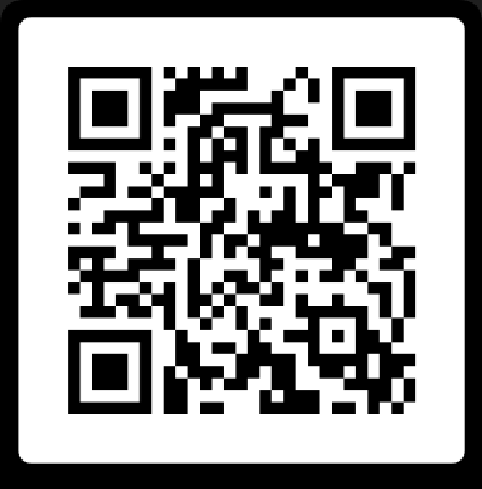

In [ ]:
import requests

def AfracNCM(prompt):

  url = "https://afrac-ncm-demo.hf.space/api/predict"

  payload = { "data": [f"{prompt}"]}

  headers = { "Content-Type": "application/json" }

  response = requests.post(url, json=payload, headers=headers)
  result = response.json()
  return result


In [ ]:
AfracNCM("Batata Frita Elma Chips")

{'data': [{'label': '20052000',
   'confidences': [{'label': '20052000', 'confidence': 0.5751689672470093},
    {'label': '19059090', 'confidence': 0.10851659625768661},
    {'label': '19041000', 'confidence': 0.08567241579294205},
    {'label': '19049000', 'confidence': 0.01533182617276907},
    {'label': '21069090', 'confidence': 0.012042242102324963}]},
  'Preparações de produtos hortícolas, fruta ou de outras partes de plantas.Outros produtos hortícolas preparados ou conservados, exceto em vinagre ou em ácido acético, não congelados, com exceção dos produtos da posição 20.06.- Batatas'],
 'is_generating': False,
 'duration': 0.04847550392150879,
 'average_duration': 0.08506948059219836}

In [ ]:
for i in range(5):
  print(i,AfracNCM("Halls Cereja")["data"][0]["label"])

0 17049020
1 17049020
2 17049020
3 17049020
4 17049020


In [ ]:
ChatGPT("Preciso de um código python para treinar um modelo que reconheça caracteres escritos à mão usando redes neurais")

"Certamente! Aqui está um exemplo de código em Python usando a biblioteca TensorFlow para treinar um modelo de reconhecimento de caracteres escritos à mão usando redes neurais convolucionais.\n\n```python\nimport tensorflow as tf\nfrom tensorflow.keras.datasets import mnist\n\n# Carrega os dados de treinamento e teste do MNIST\n(x_train, y_train), (x_test, y_test) = mnist.load_data()\n\n# Pré-processamento dos dados\nx_train = x_train.reshape((x_train.shape[0], 28, 28, 1))\nx_test = x_test.reshape((x_test.shape[0], 28, 28, 1))\nx_train, x_test = x_train / 255.0, x_test / 255.0\n\n# Define o modelo da rede neural convolucional\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),\n    tf.keras.layers.MaxPooling2D((2, 2)),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(128, activation='relu'),\n    tf.keras.layers.Dense(10, activation='softmax')\n])\n\n# Compila o modelo\nmodel.compile(optimizer='adam',\n   

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Carregar o conjunto de dados MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pré-processamento dos dados
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Criar o modelo da rede neural convolucional
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Avaliar o modelo com os dados de teste
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Acurácia do modelo nos dados de teste:", test_acc)

Epoch 1/5
938/938 [==============================] - 44s 46ms/step - loss: 0.1765 - accuracy: 0.9464
Epoch 2/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0524 - accuracy: 0.9833
Epoch 3/5
938/938 [==============================] - 42s 44ms/step - loss: 0.0368 - accuracy: 0.9884
Epoch 4/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0286 - accuracy: 0.9908
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0355 - accuracy: 0.9900
Acurácia do modelo nos dados de teste: 0.9900000095367432


313/313 [==============================] - 2s 7ms/step


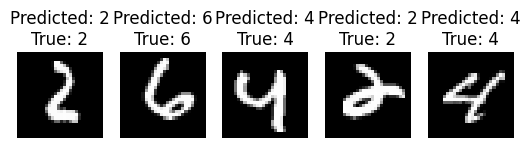

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fazer previsões no conjunto de teste
predictions = model.predict(test_images)

# Selecionar aleatoriamente 5 índices de exemplos no conjunto de teste
random_indices = np.random.choice(len(test_images), 5, replace=False)

# Exibir as imagens e as previsões correspondentes
for i, index in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[index])
    true_label = np.argmax(test_labels[index])
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')

plt.show()

Perguntei ao chatgpt:
"Queria um código que mostrasse os resultados nas mesmas imagens acima porém com as imagens de teste sofrendo uma rotação de 30 graus nas predições."

Ele me deu o código abaixo:

1/1 [==============================] - 0s 17ms/step


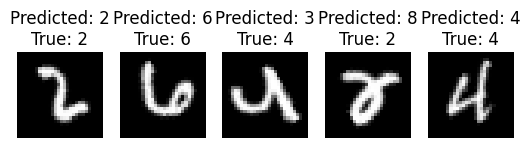

In [ ]:
import cv2
# Exibir as imagens de teste com rotação de 30 graus nas previsões
for i, index in enumerate(random_indices):
    original_image = test_images[index].reshape(28, 28) * 255  # Desfazer a normalização e escala
    original_image = original_image.astype(np.uint8)  # Converter para uint8

    # Rotação de 30 graus nas imagens de teste
    M = cv2.getRotationMatrix2D((14, 14), 30, 1)  # Rotação em torno do centro
    rotated_test_image = cv2.warpAffine(original_image, M, (28, 28), flags=cv2.INTER_LINEAR)

    # Fazer previsões na imagem rotacionada
    #rotated_test_image = rotated_test_image.astype('float32') / 255

#ESSA FOI A ÚNICA CORREÇÃO QUE PRECISEI FAZER
    rotated_test_image = rotated_test_image.astype('float32')[...,None] / 255


    rotated_test_image = np.expand_dims(rotated_test_image, axis=0)  # Adicionar dimensão de lote
    predicted_label = model.predict(rotated_test_image)
    predicted_label = np.argmax(predicted_label)

    plt.subplot(1, 5, i + 1)
    plt.imshow(rotated_test_image[0], cmap='gray')
    true_label = np.argmax(test_labels[index])
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')

plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

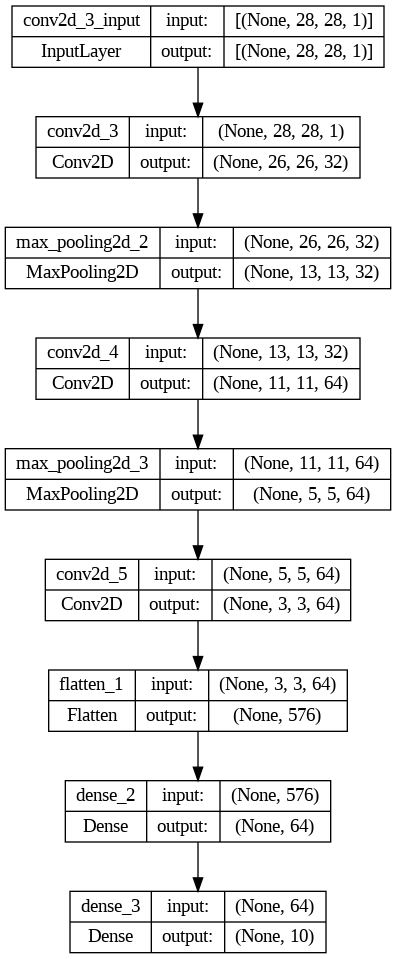

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from IPython.display import Image


# Mostrar a representação gráfica da rede neural
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

# Exibir a imagem na célula do notebook
Image(filename='model.png')

https://adamharley.com/nn_vis/cnn/3d.html

https://playground.tensorflow.org/

https://storage.googleapis.com/tfjs-models/demos/face-landmarks-detection/index.html?model=mediapipe_face_mesh

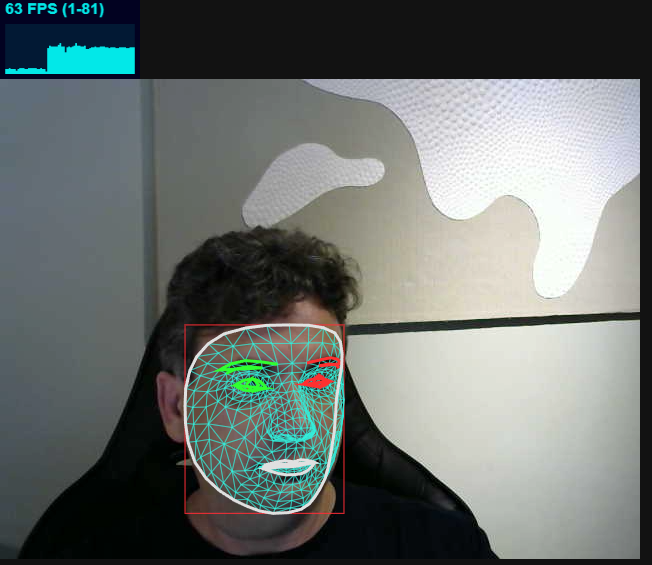

In [ ]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

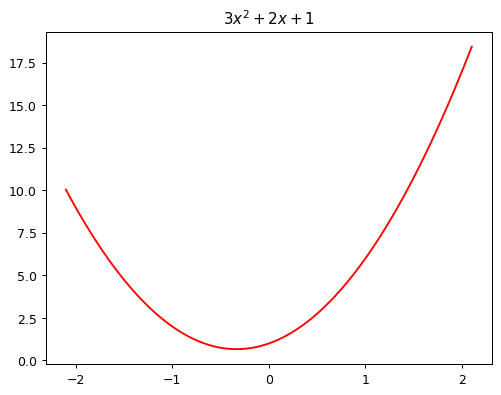

In [ ]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [ ]:
def quad(a, b, c, x): return a*x**2 + b*x + c
def mk_quad(a,b,c): return partial(quad, a,b,c)

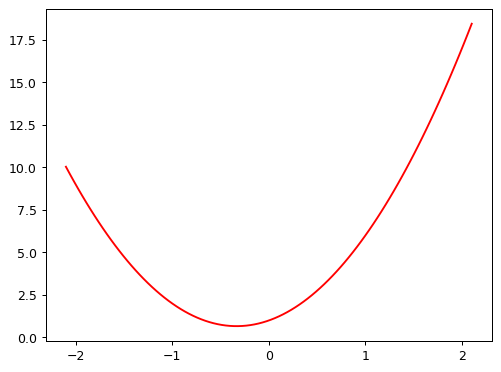

In [ ]:
f2 = mk_quad(3,2,1)
plot_function(f2)

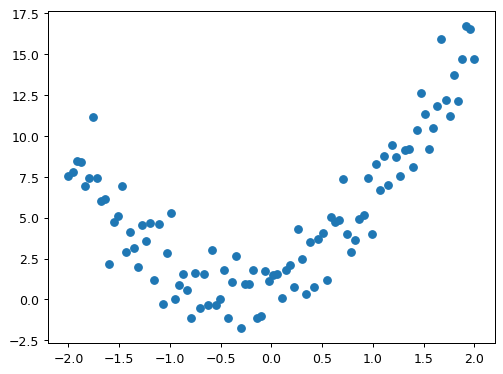

In [ ]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)
np.random.seed(42)

x = torch.linspace(-2, 2, steps=100)[:,None]
y = add_noise(f(x), 0.15, 1.5)
plt.scatter(x,y);

In [ ]:
@interact(a=2., b=2., c=2.)
def plot_quad(a, b, c):
#    clear_output()
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))
    plt.show()

interactive(children=(FloatSlider(value=2.0, description='a', max=6.0, min=-2.0), FloatSlider(value=2.0, descr…

In [ ]:
def mae(preds, acts): return (torch.abs(preds-acts)).mean()
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")
    plt.show()

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…